**Resample McDonald Kreitman statistics generated in MK_calc.ipynb.**

Analysis includes all Scer strains (Peter, et al 2018) with European S. paradoxus (Bergström et al., 2014) and North American S. paradoxus subpop B (Durand et al., 2019).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from resample import resample_med

In [2]:
#essential genes - from Winzeler et al., 1999
essential = pd.read_csv('/Users/clairedubin/sacc/external_datasets/essential.csv', header=None)
essential[1] = essential[1].str.strip('\t')
essential_genes = [i.split(' ')[0] for i in essential[1]]

In [3]:
gene_dict = {'YLR397C':'AFG2',
             'YGR098C':'ESP1',
             'YMR168C':'CEP3',
             'YKR054C': 'DYN1',
             'YHR023W':'MYO1',
             'YDR180W':'SCC2',
             'YPL174C':'NIP100',
             'YCR042C': 'TAF2',
             'YMR016C':'SOK2',
             'YJR135C':'MCM22',
             'YJL025W':'RRN7',
             'YDR443C':'SSN2',
             'YKL134C':'OCT1',
             'YPR164W':'MMS1',}

In [4]:
df = pd.read_csv('~/sacc/carly_genes/MK_stats_AllScer_AllSpar.csv')
df.head()

,gene,Ds,Dn,Ps,Pn,p
0,YLL027W,32,7,106,86,0.001117
1,YNL327W,0,0,438,457,1.000000
2,YHR170W,63,1,140,44,0.000002
3,YDL074C,63,17,225,171,0.000151
4,YBR236C,47,12,126,69,0.025226


In [5]:
df['Dn/Ds'] = df['Dn']/df['Ds']
df['Pn/Ps'] = df['Pn']/df['Ps']
df['NI'] = df['Pn/Ps']/df['Dn/Ds']

df['alpha'] = 1 - (df['Ds']*df['Pn'])/(df['Dn']*df['Pn'])

In [6]:
df['NI'].median()

2.807645833333333

In [7]:
candidates = df[df['gene'].isin(gene_dict.keys())]
candidates['name'] = [gene_dict[g] for g in candidates['gene']]
candidates[['gene','name', 'Ds', 'Dn', 'Ps', 'Pn', 'Dn/Ds', 'Pn/Ps', 'NI', 'alpha',
       ]]

<ipython-input-7-c07ffebdfd69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates['name'] = [gene_dict[g] for g in candidates['gene']]


,gene,name,Ds,Dn,Ps,Pn,Dn/Ds,Pn/Ps,NI,alpha
42,YJL025W,RRN7,69,17,163,165,0.246377,1.012270,4.108625,-3.058824
232,YKL134C,OCT1,53,9,142,95,0.169811,0.669014,3.939750,-4.888889
324,YCR042C,TAF2,155,45,661,470,0.290323,0.711044,2.449151,-2.444444
339,YKR054C,DYN1,461,222,1395,1311,0.481562,0.939785,1.951535,-1.076577
401,YGR098C,ESP1,182,73,599,477,0.401099,0.796327,1.985364,-1.493151
1730,YPL174C,NIP100,45,44,178,252,0.977778,1.415730,1.447906,-0.022727
1977,YMR016C,SOK2,76,35,326,308,0.460526,0.944785,2.051534,-1.171429
2038,YDR443C,SSN2,160,33,510,288,0.206250,0.564706,2.737968,-3.848485
2411,YLR397C,AFG2,102,27,288,155,0.264706,0.538194,2.033179,-2.777778
3140,YJR135C,MCM22,19,12,109,128,0.631579,1.174312,1.859327,-0.583333


## Resample Neutrality Index

missing:  ['CEP3']
candidate gene median NI: 2.0515337423312885
essential count: 5; nonessential_count: 8
resampling pool size: 3855
p = 0.0236
NI p=0.0236


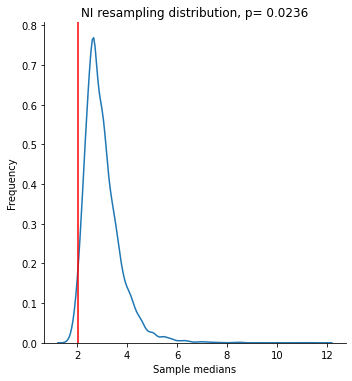

In [8]:
##Resample NI
np.random.seed(1)

print('missing: ', [gene_dict[i] for i in gene_dict.keys() if i not in candidates['gene'].tolist()])
print('NI p={}'.format(resample_med(candidates, df, 'NI', essential_genes, direction='less_than', graph=True)))

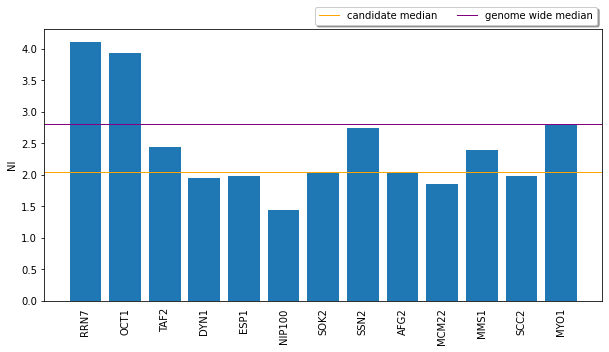

In [9]:
#plot NI by gene

plt.figure(figsize=(10, 5))
plt.bar([gene_dict[gene] for gene in candidates.gene], candidates['NI'])
plt.ylabel("NI")
plt.tick_params(axis='x', labelbottom=True, labeltop=False, bottom=False)
plt.xticks(rotation=90)
plt.axhline(y=candidates['NI'].median(),linewidth=1, color='orange', label='candidate median')
plt.axhline(y=df['NI'].median(),linewidth=1, color='purple', label='genome wide median')

plt.legend(loc='upper right', bbox_to_anchor=(1, 1.1),
      ncol=3, fancybox=True, shadow=True)

## Resample other MK stats

missing:  ['CEP3']
candidate gene median Dn/Ds: 0.3505747126436782
essential count: 5; nonessential_count: 8
resampling pool size: 3855
p = 0.048
Dn/Ds p=0.048


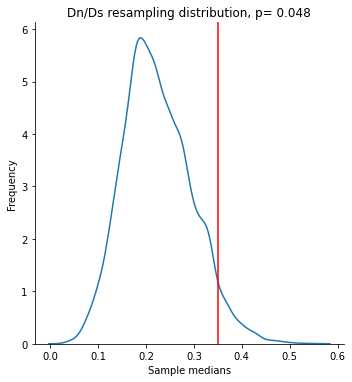

In [10]:
np.random.seed(5)

print('missing: ', [gene_dict[i] for i in gene_dict.keys() if i not in candidates['gene'].tolist()])
print('Dn/Ds p={}'.format(resample_med(candidates, df, 'Dn/Ds', essential_genes, direction='greater_than', graph=True)))

missing:  ['CEP3']
candidate gene median Pn/Ps: 0.8240917782026769
essential count: 5; nonessential_count: 8
resampling pool size: 3855
p = 0.0485
Pn/Ps p=0.0485


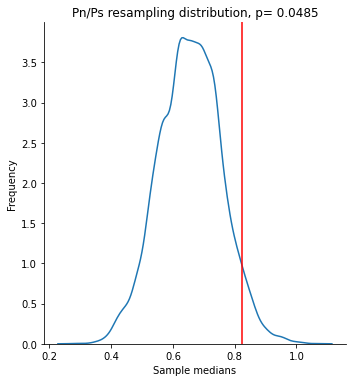

In [11]:
np.random.seed(4)

print('missing: ', [gene_dict[i] for i in gene_dict.keys() if i not in candidates['gene'].tolist()])
print('Pn/Ps p={}'.format(resample_med(candidates, df, 'Pn/Ps', essential_genes, direction='greater_than', graph=True)))

missing:  ['CEP3']
candidate gene median alpha: -1.8524590163934427
essential count: 5; nonessential_count: 8
resampling pool size: 3855
p = 0.0463
alpha p=0.0463


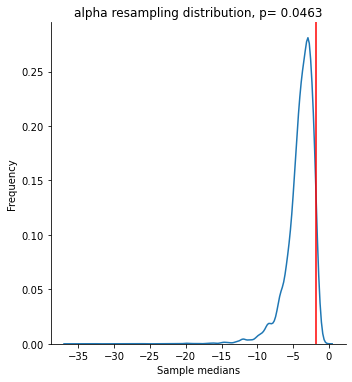

In [12]:
np.random.seed(3)

print('missing: ', [gene_dict[i] for i in gene_dict.keys() if i not in candidates['gene'].tolist()])
print('alpha p={}'.format(resample_med(candidates, df, 'alpha', essential_genes, direction='greater_than', graph=True)))

## Plotting other stats

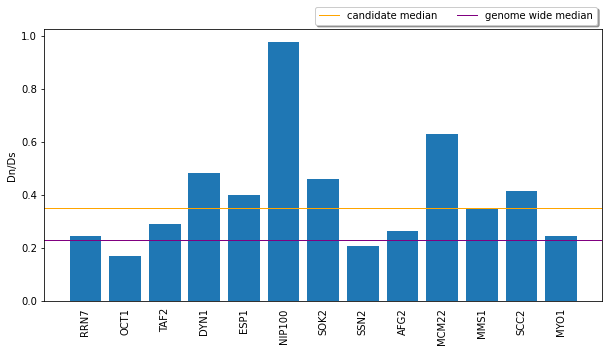

In [13]:
#plot Dn/Ds by gene

plt.figure(figsize=(10, 5))
plt.bar([gene_dict[gene] for gene in candidates.gene], candidates['Dn/Ds'])
plt.ylabel("Dn/Ds")
plt.tick_params(axis='x', labelbottom=True, labeltop=False, bottom=False)
plt.xticks(rotation=90)
plt.axhline(y=candidates['Dn/Ds'].median(),linewidth=1, color='orange', label='candidate median')
plt.axhline(y=df['Dn/Ds'].median(),linewidth=1, color='purple', label='genome wide median')

plt.legend(loc='upper right', bbox_to_anchor=(1, 1.1),
      ncol=3, fancybox=True, shadow=True)

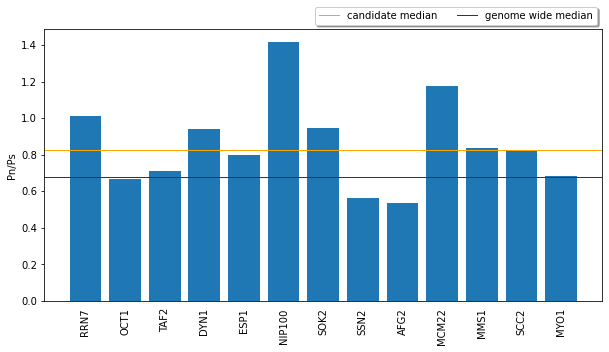

In [14]:
#plot Pn/Ps by gene

plt.figure(figsize=(10, 5))
plt.bar([gene_dict[gene] for gene in candidates.gene], candidates['Pn/Ps'])
plt.ylabel("Pn/Ps")
plt.tick_params(axis='x', labelbottom=True, labeltop=False, bottom=False)
plt.xticks(rotation=90)
plt.axhline(y=candidates['Pn/Ps'].median(),linewidth=1, color='orange', label='candidate median')
plt.axhline(y=df['Pn/Ps'].median(),linewidth=1, color='purple', label='genome wide median')

plt.legend(loc='upper right', bbox_to_anchor=(1, 1.1),
      ncol=3, fancybox=True, shadow=True)

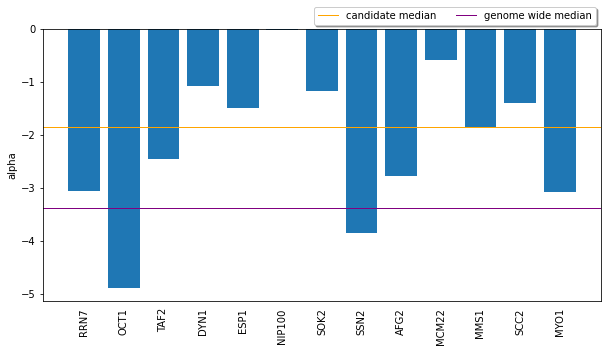

In [15]:
#plot alpha by gene

plt.figure(figsize=(10, 5))
plt.bar([gene_dict[gene] for gene in candidates.gene], candidates['alpha'])
plt.ylabel("alpha")
plt.tick_params(axis='x', labelbottom=True, labeltop=False, bottom=False)
plt.xticks(rotation=90)
plt.axhline(y=candidates['alpha'].median(),linewidth=1, color='orange', label='candidate median')
plt.axhline(y=df['alpha'].median(),linewidth=1, color='purple', label='genome wide median')

plt.legend(loc='upper right', bbox_to_anchor=(1, 1.1),
      ncol=3, fancybox=True, shadow=True)

## Resample Dn, Ds, Pn, Ps individually

In [16]:
import os
from Bio import SeqIO

#normalize to gene length
codon_dir = '/Users/clairedubin/sacc/carly_genes/alignments/1011Scer_allSpar_codon_alignments/codons_aligned/'
seq_lengths = {}
for f in os.listdir(codon_dir):
    
    gene = f.strip('.pal2nal.fasta')
    
    for record in SeqIO.parse(codon_dir+f, 'fasta'):
        seq_lengths[gene] = len(record.seq)
        break
        
df_norm = df.merge(pd.DataFrame.from_dict(seq_lengths, orient='index'), right_index=True, left_on='gene')
df_norm = df_norm.rename(columns={0:'seq_length'})

for i in ['Dn','Ds','Pn','Ps']:
    
    df_norm[i+'_norm'] = df_norm[i]/df_norm['seq_length']

In [22]:
candidates_norm = df_norm[df_norm['gene'].isin(gene_dict.keys())]

np.random.seed(2)

for i in ['Dn','Ds','Pn','Ps']:
    
    print('{} resampling (normalized to sequence length)'.format(i))
    print('missing: ', [gene_dict[i] for i in gene_dict.keys() if i not in candidates_norm['gene'].tolist()])
    r = resample_med(candidates_norm, df_norm, i+'_norm', essential_genes, direction='greater_than')
    print()

Dn resampling (normalized to sequence length)
missing:  ['CEP3']
candidate gene median Dn_norm: 0.0144515517649846
essential count: 5; nonessential_count: 8
resampling pool size: 3855
p = 0.0103

Ds resampling (normalized to sequence length)
missing:  ['CEP3']
candidate gene median Ds_norm: 0.03774666339146811
essential count: 5; nonessential_count: 8
resampling pool size: 3855
p = 0.3457

Pn resampling (normalized to sequence length)
missing:  ['CEP3']
candidate gene median Pn_norm: 0.10734463276836158
essential count: 5; nonessential_count: 8
resampling pool size: 3855
p = 0.0168

Ps resampling (normalized to sequence length)
missing:  ['CEP3']
candidate gene median Ps_norm: 0.12307692307692308
essential count: 5; nonessential_count: 8
resampling pool size: 3855
p = 0.0595

